# FRAC VS PRODUCTION FOR NE BC:  
## A REGRESSION PROBLEM

Kevin Fossenier, April 22/2021

## THE PROBLEM

Over the past decade, hydrocarbon extraction has been largely dominanted in North America by unconventional production.  Unconventional in this case means extracting hydrocarbons from reservoirs using aggressive completion techniques such as hydraulic fracturing and horizontal drilling.  Prior to these two technologies being developed to work togethe rin tandem, these "reservoirs" would have not been considered a target for production.  The Frac vs Production problem combines inputs from two datasets; production and the western canadian frac database (WCFD). The study area is in the northeastern part of British Columbia (Figure 1), an area of prolific unconventional production primarily coming from the Montney Formation.

The vast majority of these wells are now drilled laterally in the rock and completion is typically restricted to the horizontal length of the well.  The term 'Frac' refers to fracture and in this case means hydraulically fracture rock below the surface to create flow paths (permeability) for the hydrocarbons trapped in the rock's pore space.  Water is pumped at high pressures through small openings.  The fracture propagates through the rock and tiny sand grains (proppant) are added to the fluid.  These grains becomes lodged in the crack/fracture as a prop to prevent the fracture from closing on itself after the operation is done.  How all of this is achieved varies from well to well, but generally there is a limited number of techniques used to fracture complete a well and those inputs are summarized in this dataset.

With the advent of unconventional production many companies believe that inputs to the drilling and completion of a well can largely dictate the productive capacity.  This concept runs counter to standard ideology that the reservoir characteristics (pressure, permeability, porosity) ultimately dictate the productive capacity, often irrespective of how it was drilled or completed.  The problem is that reservoir characteristics below the surface are difficult to determine, especially in unconventional reservoirs (and even more difficult to extrapolate in teh parts that the hydraulic fracture reaches).     

The problem that is being attempted to solve is can we accurately predict the production solely based on inputs that a company can largely control and quantify.  In addition, we are also testing the hypothesis that that reservoir quality as a primary dictator of well productivity.  For this study, we will use the current primary completion, and to limited degree the drilling, inputs to determine the production 12months post welll completion.  These inputs include completed length (drilling and completion input), total proppant or average proppant placed, fracture completion equipment used, fracture fluid type, and a few others.  The time interval of 12months was selected was selected because production in the early stages after completion, are not a direct indicator of the "real" productive capability.  Some wells start strong and rapidly decline while others are held back for a variety of reasons by the operator (e.g. pipeline capacity, preserve condensate production, to prevent damaging the reservoir, production optimization not reached).  Usually, by the time 12months the well's true nature is well established and the operator is producing it an optimal level.     

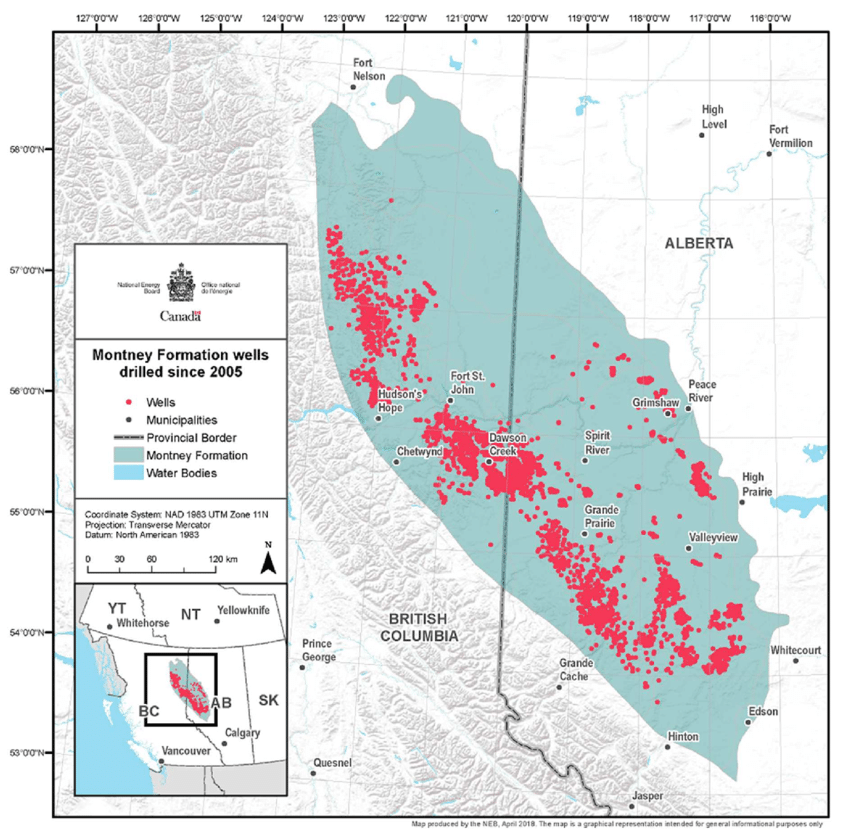

Figure 1:  Distribution of Montney (unconventional) wells for Alberta and British Columbia.  Study area is restricted to BC.  Figure from Government of Canada


## METHODOLOGY

### DATA ACQUISITION AND LOADING

In [3]:
# import pandas, matplotlib, numpy and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# import iris dataframe
df = pd.read_csv('BCmontney_frac.csv', encoding='UTF-8')

### DATA OVERVIEW

In [5]:
# plot first (X) number of rows.  Default is 5 if unspecific
df.head()

,Unique Well ID,Region,Operator Name,First 12 mo CUM GAS Mcf,First 12 mo CUM CND/OIL Bbl,First 12 mo CUM BOE Bbl,First 12 mo Monthly WTR Bbl,First 12 mo CALENDAR DAILY AVG GAS Mcf,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completion Year WCFD,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Technology Group WCFD,Avg Proppant Placed WCFD (t/m),Total Proppant Placed WCFD (t),Frac Fluid WCFD,Avg Fluid Pumped WCFD (m3/s)
0,100/13-16-077-14W6/00,south_graben,OVINTIV CANADA ULC,4552752,109690,868482,27229,12473,2379,5094,8263,2018,2785,100,28,Plug and Perf,2.0,5544.0,SW,478.3
1,103/01-35-077-15W6/00,south_graben,OVINTIV CANADA ULC,4283001,125853,839687,32997,11734,2301,5387,8578,2018,3049,102,30,Plug and Perf,1.8,5334.0,SW,430.7
2,100/13-26-077-15W6/00,south_graben,OVINTIV CANADA ULC,4278742,169076,882199,40013,11723,2417,6195,8546,2018,3841,101,38,Plug and Perf,1.8,6862.0,SW,441.7
3,100/08-35-077-15W6/00,south_graben,OVINTIV CANADA ULC,4196318,95509,794896,46579,11497,2178,5530,8542,2018,3049,102,30,Plug and Perf,1.8,5355.0,SW,429.5
4,100/07-15-080-19W6/00,south_graben,SHELL CANADA LIMITED,4185992,4,697670,21629,11437,1906,4739,8534,2019,2167,56,39,Ball and Seat/Coil Tubing,0.9,1999.0,SW,250.1


In [6]:
# dataframe overview summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unique Well ID                           2274 non-null   object 
 1   Region                                   2274 non-null   object 
 2   Operator Name                            2274 non-null   object 
 3   First 12 mo CUM GAS  Mcf                 2274 non-null   int64  
 4   First 12 mo CUM CND/OIL  Bbl             2274 non-null   int64  
 5   First 12 mo CUM BOE  Bbl                 2274 non-null   int64  
 6   First 12 mo Monthly WTR  Bbl             2274 non-null   int64  
 7   First 12 mo CALENDAR DAILY AVG GAS  Mcf  2274 non-null   int64  
 8   First 12 mo CALENDAR DAILY AVG BOE  Bbl  2274 non-null   int64  
 9   Total Measured Depth (m) WCFD            2274 non-null   int64  
 10  First 12 mo CUM HRS  hrs                 2274 no

In [7]:
# shape attribute - dimension of array of dataframe
df.shape

(2274, 20)

The data is reviewd and evaluated to ensure the import brought the values in the correct format (int, float, object, etc) and to assess the dataframe's shape and dimensionality.  The dataset is a combined product of two datasets joined together in excel and saved as a csv.  This dataframe has 2274 rows and 20 features.

Features of this dataframe include:
    
    1.Unique Well ID: The Geographic location for a well using either the NTS or DLS survey system. 
    2.Region:  Assigned value based on the well's position to relative a geologic feature, the Ft St John graben.       3.Operator Name:  Name of the company that is responsible for the well and performed the completion/drilling       4.First 12 mo CUM GAS(Mcf):  Cumulative gas (mcf; thousands cubic feet) for the first 12months                
    5.First 12 mo CUM CND/OIL(Bbl):  Cumulative condensate/oil (bbl; barrels) for the first 12months              
    6.First 12 mo CUM BOE(Bbl):  Cumulative gas/oil/condensate (BOE; barrel of oil equivalent) for the first 12months       
    7.First 12 mo Monthly WTR  Bbl:  Cumulative water (mcf) for the first 12months                
    8.First 12 mo CALENDAR DAILY AVG GAS(Mcf): Daily gas production averaged/prorated for the time it produced in the 12month period  
    9.First 12 mo CALENDAR DAILY AVG BOE(Bbl): Daily gas production averaged/prorated for the time it produced in the 12month period     
    10.Total Measured Depth(m) WCFD:  Total measured length of the wellbore including the vertical and lateral parts (metres).         
    11.First 12 mo CUM HRS:  Total number of hours the well was on production in the first 12months (max = 8760 hours).
    12.Completion Year WCFD:  The year the well was completed.                      
    13.Completed Length (m) WCFD:  The length over which a completion exists.  For horizontal wells this typically is the entire lateral.                
    14.Avg Frac Spacing (m/s):  Average spacing between the hydraulic fracture completions.  Only relevant to horizontal wells with more than 1 completion.                   
    15.Stages Actual WCFD:  A stage is separate completion event in a wellbore.  For horizontals there are multiple stages.                       
    16.Technology Group WCFD:  To isolate and facilitate the completion in a specific part of the wellbore, mechanical technologies are typically required.  This identifies the type used for this well.                  
    17.Avg Proppant Placed WCFD (t/m):  Average proppant (tiny sand grains used to hold open the fracture) placed over the completed well length.  Typically derived from Total proppant / completed length.             
    18.Total Proppant Placed WCFD (t): Total proppant (tiny sand grains used to hold open the fracture) placed over the completed well length.          
    19.Frac Fluid WCFD:  Generalized fluid type used to initiate the frac and carry the proppant.  Companies develop proprietary recipes, but all fall within a handful of general types.                         
    20.Avg Fluid Pumped WCFD (m3/s):  Average amount of fluid pumped over the completed length of the wellbore (m3/s; cubic metres/shot or opening).  Total fluid pumped / completed length.            

### DATA WRANGLING

Next, we look for missing data and if there are any, deal with them either by deletion or imputing a value. In this case, the dataset is clean and there are no missing values.  If there were missing values they would either be deleted or imputed (e.g. replaced by mean, median, or specific value).

In [8]:
# check for missing values in each column and sum using pandas
df.isnull().sum()

# fill missing values with specified (X) value 
# df.fillna()
# no missing values in this dataset

Unique Well ID                             0
Region                                     0
Operator Name                              0
First 12 mo CUM GAS  Mcf                   0
First 12 mo CUM CND/OIL  Bbl               0
First 12 mo CUM BOE  Bbl                   0
First 12 mo Monthly WTR  Bbl               0
First 12 mo CALENDAR DAILY AVG GAS  Mcf    0
First 12 mo CALENDAR DAILY AVG BOE  Bbl    0
Total Measured Depth (m) WCFD              0
First 12 mo CUM HRS  hrs                   0
Completion Year WCFD                       0
Completed Length (m) WCFD                  0
Avg Frac Spacing (m/s)                     0
Stages Actual WCFD                         0
Technology Group WCFD                      0
Avg Proppant Placed WCFD (t/m)             0
Total Proppant Placed WCFD (t)             0
Frac Fluid WCFD                            0
Avg Fluid Pumped WCFD (m3/s)               0
dtype: int64

In [9]:
# delete not necessary to the analysis.  Others will follow further analysis
df = df.drop(columns = ['Unique Well ID', 'Region', 'Operator Name', 'First 12 mo Monthly WTR  Bbl', 
                        'First 12 mo CUM GAS  Mcf', 'First 12 mo CUM CND/OIL  Bbl', 
                        'First 12 mo CALENDAR DAILY AVG GAS  Mcf', 'First 12 mo CUM BOE  Bbl', 
                        'Total Proppant Placed WCFD (t)', 'Completion Year WCFD'])

# confirm change
df.head()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Technology Group WCFD,Avg Proppant Placed WCFD (t/m),Frac Fluid WCFD,Avg Fluid Pumped WCFD (m3/s)
0,2379,5094,8263,2785,100,28,Plug and Perf,2.0,SW,478.3
1,2301,5387,8578,3049,102,30,Plug and Perf,1.8,SW,430.7
2,2417,6195,8546,3841,101,38,Plug and Perf,1.8,SW,441.7
3,2178,5530,8542,3049,102,30,Plug and Perf,1.8,SW,429.5
4,1906,4739,8534,2167,56,39,Ball and Seat/Coil Tubing,0.9,SW,250.1


There are numerous features not necessary to the analysis and they can be easily deleted outright.  These include the UWI, Region, Operator Name.  Since the number of hours varies from well to well and wells can produce condensate, oil and gas, the 'Calendar Daily Avg BOE bbl' was selected as the target.  This makes First 12 mo CUM GAS, First 12 mo CUM CND/OIL, and First 12 mo CALENDAR DAILY AVG GAS no longer relevant to the study since they all are variations of the target variable.  Also, the completion year although may have a correlation to the target, it isn't something a company can control and any future unseen data would provide a year that wasn't seen in the train/test dataset.  Total proppant and Average Proppant Placed are essentially the same values just represented differently.  The 'Avg Proppant placed' will be kept and Total proppant placed deleted.  

In [10]:
# basic summary stats of dataframe and defined quartiles
df.describe()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Avg Proppant Placed WCFD (t/m),Avg Fluid Pumped WCFD (m3/s)
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,508.763852,4369.712401,6485.987687,1916.759015,114.806948,22.160070,1.292392,554.378188
std,364.243984,633.545706,1769.198472,586.624404,80.737320,12.127126,3.350147,285.678219
min,0.000000,2715.000000,22.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,260.000000,3900.000000,5703.250000,1461.000000,60.000000,13.000000,0.700000,326.075000
50%,419.500000,4327.000000,6991.500000,1837.000000,94.000000,21.000000,1.000000,529.950000
75%,646.000000,4745.000000,7782.500000,2262.500000,146.000000,28.000000,1.500000,737.375000
max,2417.000000,6688.000000,8784.000000,5268.000000,1589.000000,118.000000,120.000000,3461.700000


Summary statistics of the numeric dataset are summarized above and values, such as mean, std (standard deviation), min and max can aid the data wrangling process. Of note is the 'First 12mo CUM HRS' has an unacceptably wide range.  A year is 8760hours and lot of the data is well below that value.  Acknowledging the fact that wells brought on initial production often take a long time before they produce consistently, a 6month (4380 hours) cutoff will be applied. 
The target must have some production to predict, so values < 1 will be deleted.  

In [11]:
# delete values < 4380 for First 12mo cum hours
# Get indexes where name column has value <4380
indexNames = df[df['First 12 mo CUM HRS  hrs'] < 4380].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [12]:
# delete values < 1 for First Calendar Daily Avg BOE bbl
# Get indexes where name column has values < 1
indexNames = df[df['First 12 mo CALENDAR DAILY AVG BOE  Bbl'] < 1].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [13]:
# confirm changes
df.describe()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Avg Proppant Placed WCFD (t/m),Avg Fluid Pumped WCFD (m3/s)
count,2029.00000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000
mean,544.86348,4386.522425,6960.738295,1936.429768,113.839823,22.534746,1.233563,559.569443
std,362.32323,638.982255,1070.790752,590.573360,81.523859,12.137542,1.507680,286.011830
min,22.00000,2715.000000,4380.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,300.00000,3908.000000,6166.000000,1480.000000,60.000000,14.000000,0.700000,328.700000
50%,456.00000,4352.000000,7198.000000,1852.000000,93.000000,21.000000,1.000000,533.000000
75%,679.00000,4763.000000,7836.000000,2294.000000,141.000000,29.000000,1.600000,739.100000
max,2417.00000,6688.000000,8784.000000,5268.000000,1589.000000,102.000000,59.700000,3461.700000


### OUTLIER ANALYSIS

Box plots are useful visualizations of the summary statistics noted above. However, they also highlight potential outliers that fall outside the 25 and 75th percentile (coloured filled box). The min and max are the noted by horizontal terminations of the lines. Outliers are typically calculated by 1.5 * Q3-Q1 range, but this calculation is only indicative of potential outliers and not a conclusive measurement. 

The numeric input variables are plotted and almost all indicate the presence of potential outliers.  Curiously, the inputs all seem to indicate outliers beyond Q3 (75%) and little to no outliers below Q1 (25%).  This suggests the data is skewed.   This interpretation is confirmed by the skewness measure below.  Average proppant placed is positively skewed in the extreme.  The target indicates positive skewness as does average frac spacing, stages actual, and average fluid pumped.  Total measured depth and completed lenth are only mildly skewed.

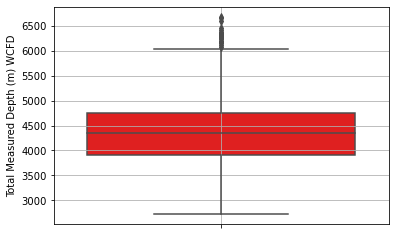

In [14]:
# box plot using seaborn for First 12 mo CUM GAS  Mcf 
sns.boxplot(y=df["Total Measured Depth (m) WCFD"], color="red" );
plt.grid()
plt.show()

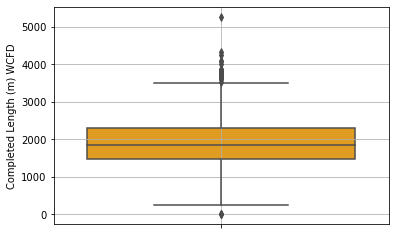

In [15]:
# box plot using seaborn for First 12 mo CUM GAS  Mcf 
sns.boxplot(y=df["Completed Length (m) WCFD"], color="orange" );
plt.grid()
plt.show()

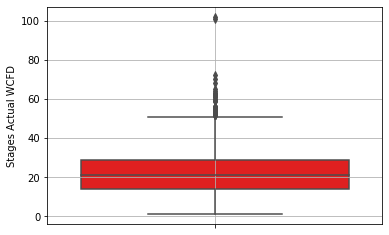

In [16]:
# box plot using seaborn for First 12 mo CUM GAS  Mcf 
sns.boxplot( y=df["Stages Actual WCFD"], color="red" );
plt.grid()
plt.show()

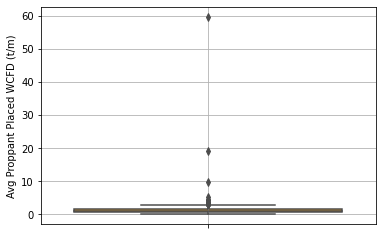

In [17]:
# box plot using seaborn for First 12 mo CUM GAS  Mcf 
sns.boxplot( y=df["Avg Proppant Placed WCFD (t/m)"], color="orange" );
plt.grid()
plt.show()

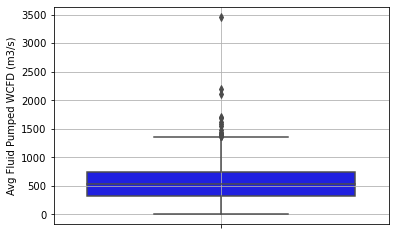

In [18]:
# box plot using seaborn for First 12 mo CUM GAS  Mcf 
sns.boxplot( y=df["Avg Fluid Pumped WCFD (m3/s)"], color="blue" );
plt.grid()
plt.show()

In [19]:
# skewness of data
df.skew()

First 12 mo CALENDAR DAILY AVG BOE  Bbl     1.566378
Total Measured Depth (m) WCFD               0.507200
First 12 mo CUM HRS  hrs                   -0.613095
Completed Length (m) WCFD                   0.720663
Avg Frac Spacing (m/s)                      4.872310
Stages Actual WCFD                          1.009415
Avg Proppant Placed WCFD (t/m)             29.794221
Avg Fluid Pumped WCFD (m3/s)                1.154061
dtype: float64

Selection and deletion of certain variables based on ranges will be completed in the section below.  Clearly Avg Proppant Placed is very skewed.

### BIVARIATE & UNIVARIATE ANALYSIS

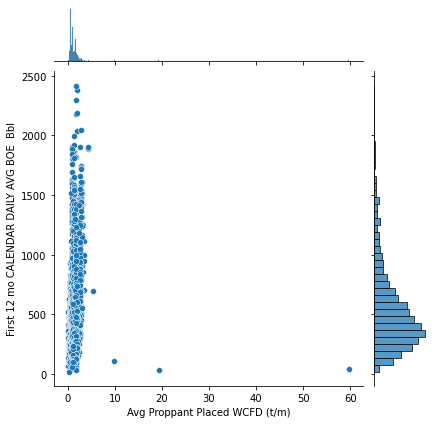

In [20]:
# a closer look at highly skewed inputs
# jointplot of Avg Proppant Placed vs 12mo CALENDAR DAILY AVG BOE_Bbl"
sns.jointplot(data=df, x="Avg Proppant Placed WCFD (t/m)", y="First 12 mo CALENDAR DAILY AVG BOE  Bbl")

The distribution is highly constrained to values approximately <5.  There are only 3 or 4 points outside that range so we can delete those values.  

In [21]:
# delete values > 5 for Avg Proppant Placed WCFD (t/m)
# Get indexes where name column has value >5
indexNames = df[df['Avg Proppant Placed WCFD (t/m)'] > 5].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

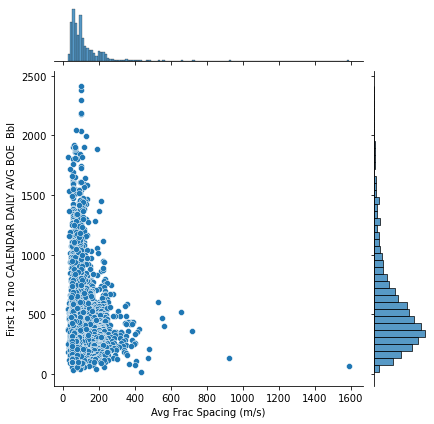

In [22]:
# a closer look at highly skewed inputs
# jointplot of Avg Frac Spacing (m/s) vs 12mo CALENDAR DAILY AVG BOE_Bbl"
sns.jointplot(data=df, x="Avg Frac Spacing (m/s)", y="First 12 mo CALENDAR DAILY AVG BOE  Bbl")

Data is very concentrated to <400m/s.  Using the 1.5*(Q3-Q1) for outlier definition in the box plots, give us an upper value of 262.5, but that would truncate a significant amount of data.  There are approx 7 data points above 500 that likely can be safely removed

In [23]:
# delete values > 500 for Avg Frac Spacing (m/s)
# Get indexes where name column has values >500
indexNames = df[df['Avg Frac Spacing (m/s)'] > 500].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

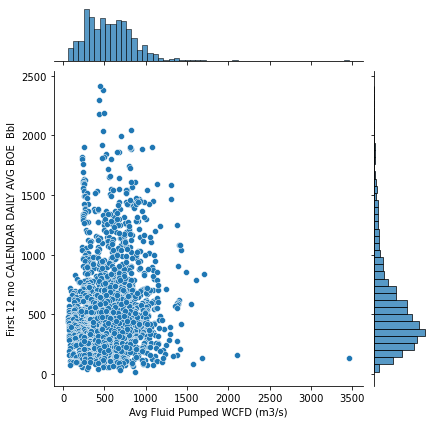

In [24]:
# a closer look at highly skewed inputs
# jointplot of Avg Proppant Placed vs 12mo CALENDAR DAILY AVG BOE_Bbl"
sns.jointplot(data=df, x="Avg Fluid Pumped WCFD (m3/s)", y="First 12 mo CALENDAR DAILY AVG BOE  Bbl")

Good clustering of the data below 1500m3/s and only a couple data points above 2000m3/s.  Those two data points will be removed from the dataset.

In [25]:
# delete values > 2000 for Avg Fluid Pumped WCFD (m3/s
# Get indexes where name column has values > 2000
indexNames = df[df['Avg Fluid Pumped WCFD (m3/s)'] > 2000].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [26]:
# confirm changes
df.describe()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Avg Proppant Placed WCFD (t/m),Avg Fluid Pumped WCFD (m3/s)
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,546.526786,4387.046131,6958.564484,1939.889385,111.471726,22.643353,1.192907,556.842907
std,362.459721,640.021714,1071.847577,586.853113,67.688450,12.073361,0.614550,273.117506
min,22.000000,2715.000000,4380.000000,262.000000,27.000000,1.000000,0.000000,55.200000
25%,301.750000,3908.750000,6166.000000,1481.750000,60.000000,14.000000,0.700000,329.675000
50%,457.000000,4353.000000,7195.000000,1855.000000,93.000000,21.000000,1.000000,532.950000
75%,680.250000,4763.500000,7834.500000,2294.000000,140.000000,29.000000,1.600000,738.550000
max,2417.000000,6688.000000,8784.000000,5268.000000,478.000000,102.000000,4.300000,1702.700000


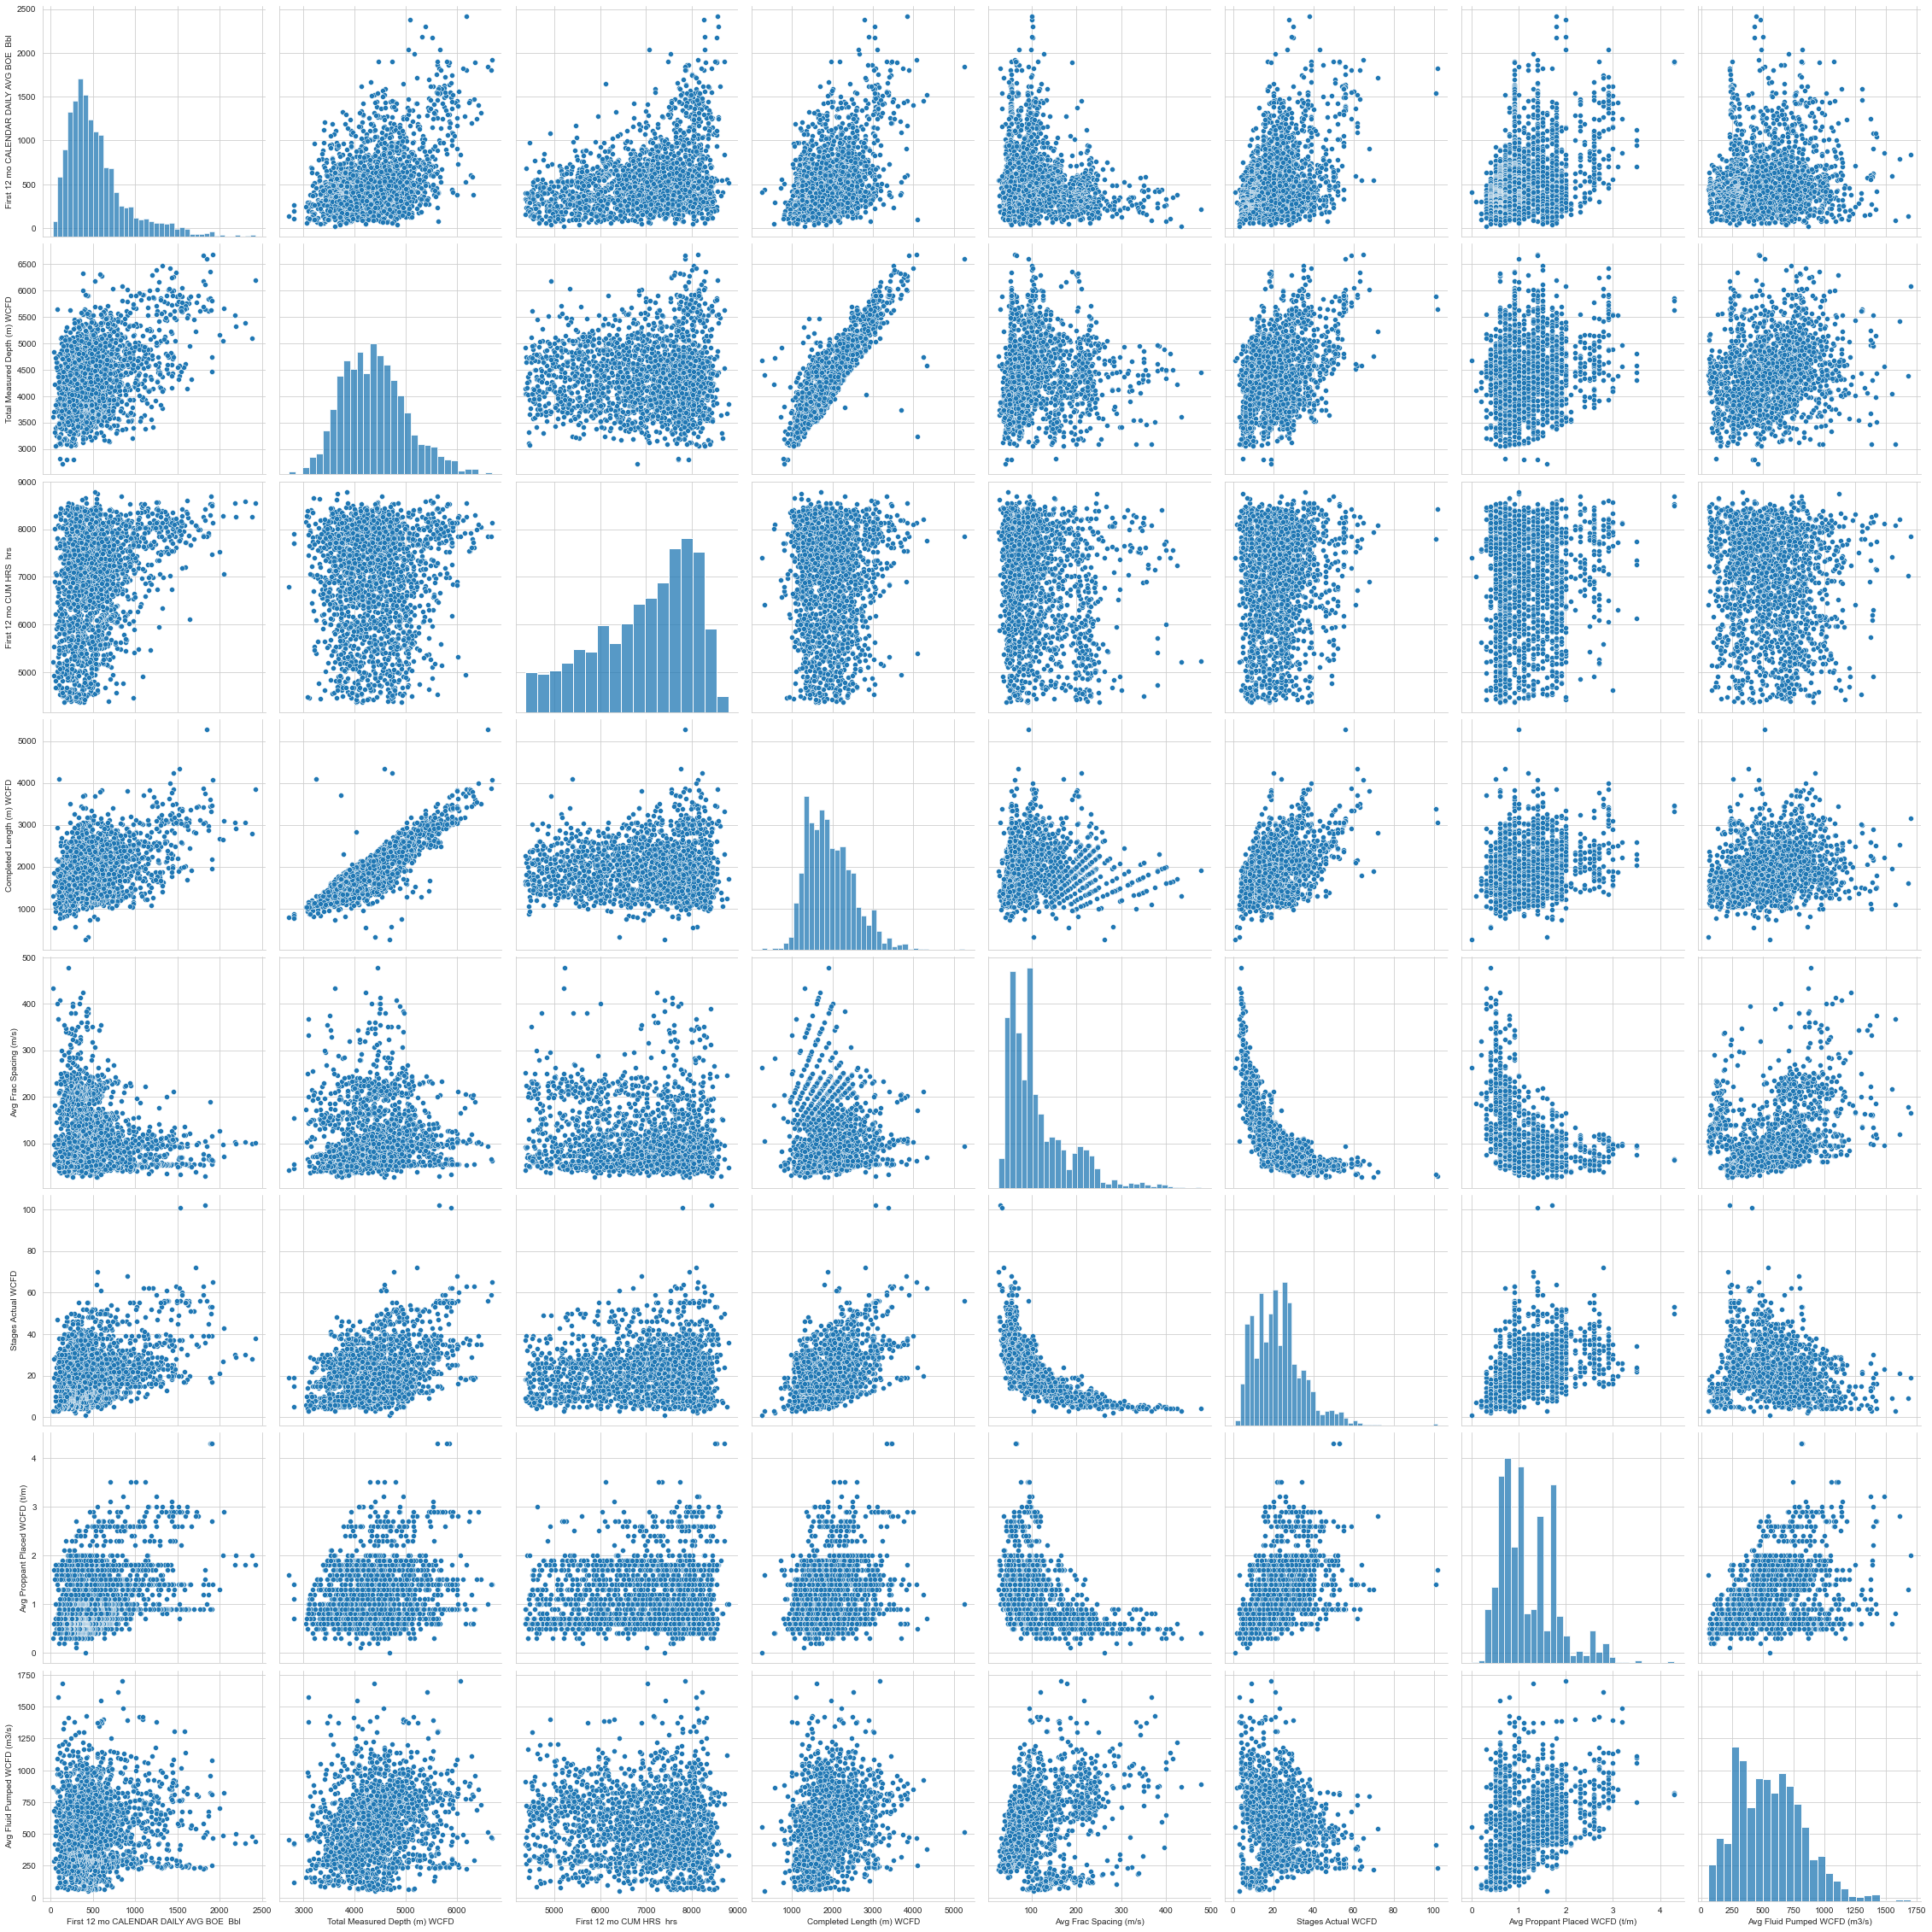

In [27]:
# a bivariate analysis (Pairplot) using seaborn
sns.set_style('whitegrid')
sns.pairplot(df,height=4)
plt.show()

The univariate plots are shown in the diagonal from upper left to bottom right corners.  The distributions are generally skewed to the right.  The bivariate plots exhibit overall good concentration of data with limited visually obvious outlier data.  Most plots only exhibit weak to no correlation, with the exception of total measured depth vs completed length which has a strong positive correlation.  
Average frac spacing vs stages actual appear to exhibit a negative non-linear correlation.  

### CORRELATION

Correlation does not imply causation. It is important to know the difference between correlation, a measure of the extent of interdependence between variables, the relationship between cause and effect between two variables. Pearson Correlation (REF??) measures the linear dependence between two variables X and Y and is summarized:

    1. >0 and <=1 positive linear correlation, increasing towards 1 
    2. 0 (or near zero):, no correlation positive correlation 
    3. <0 and >= -1: negative linear correlation, increasing towards -1.
    
The P-value (ref 1) is the probability value that the correlation between two variables is statistically significant. By convention, a significance level of 0.05 is used (i.e. 95% confidence) to determine the correlation between the two variables is significant. Interpreting the p-values is as follows: 
p-value < 0.001: strong evidence that the correlation is significant. p-value < 0.05: there is moderate evidence that the correlation is statistically significant. p-value > 0.1: low evidence that the correlation is significant. p-value is > 0.1: no evidence that the correlation is significant.

1: https://en.wikipedia.org/wiki/P-value

In [28]:
# pearsons correlation 
df.corr()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Avg Proppant Placed WCFD (t/m),Avg Fluid Pumped WCFD (m3/s)
First 12 mo CALENDAR DAILY AVG BOE Bbl,1.000000,0.460562,0.326424,0.460175,-0.180801,0.373747,0.378346,0.091921
Total Measured Depth (m) WCFD,0.460562,1.000000,0.063718,0.874858,0.078049,0.351331,0.181949,0.262351
First 12 mo CUM HRS hrs,0.326424,0.063718,1.000000,0.049018,-0.143155,0.162989,0.134270,-0.112710
Completed Length (m) WCFD,0.460175,0.874858,0.049018,1.000000,0.032326,0.440024,0.256017,0.279859
Avg Frac Spacing (m/s),-0.180801,0.078049,-0.143155,0.032326,1.000000,-0.713860,-0.414431,0.398484
Stages Actual WCFD,0.373747,0.351331,0.162989,0.440024,-0.713860,1.000000,0.432034,-0.226811
Avg Proppant Placed WCFD (t/m),0.378346,0.181949,0.134270,0.256017,-0.414431,0.432034,1.000000,0.375285
Avg Fluid Pumped WCFD (m3/s),0.091921,0.262351,-0.112710,0.279859,0.398484,-0.226811,0.375285,1.000000


<AxesSubplot:>

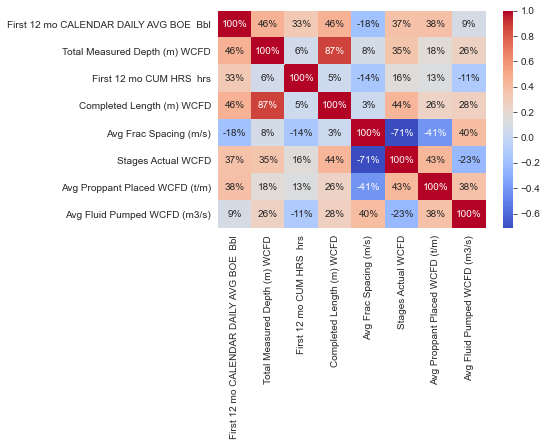

In [29]:
# annotated heatmap of above pearsons correlation
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')

In [30]:
# calculate p-value
from scipy import stats
# test input features with high Pearson Correlation for statistical significance
pearson_coef, p_value = stats.pearsonr(df['Stages Actual WCFD'], df['Avg Frac Spacing (m/s)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7138603664764747  with a P-value of P = 6.072430463e-314


In [31]:
# calculate p-value
# test input features with high Pearson Correlation for statistical significance
pearson_coef, p_value = stats.pearsonr(df['Completed Length (m) WCFD'], df['Total Measured Depth (m) WCFD'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8748575124940039  with a P-value of P = 0.0


Based on the correlation matrix and heatmap above, the following features are strongly correlated:

1. 'Total Measured depth' and 'Completed length': 87% positive correlation.  Completed length is a component of total length or total measured depth in this case.  P-values of  0 >.5, therefore, correlation is not statistical significant. 
2. 'Avg Frac Spacing' and 'Stages Actual': 71% negative correlation.  That is, with increasing 'stages' the 'average frac spacing' gets smaller.  P-values of 6.1e-32 <<0.001, therefore, correlation has a very strong statistical significance 
These two associations may require further wrangling, but will be kept for now.

Completed length and Total Measured Depth are only weakly correlated to the target First 12mo Calendar Daily Avg BOE.  No other numeric inputs appear to correlate well with the target variable.  

## MODEL BUILD & OUTPUT

### FEATURE PREPROCESSING

Some of the input features are categorical and will need to be converted to numeric before running a model.  These include:  Frac Fluid and Technology Group.  



In [32]:
from sklearn.preprocessing import LabelEncoder
# label encoder converts labels into numeric form so the machine can read the data
# convert categorical to numeric for correlation
# Encode labels of multiple columns at once
cols = ['Technology Group WCFD', 'Frac Fluid WCFD']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

# confirm change
df.head()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Total Measured Depth (m) WCFD,First 12 mo CUM HRS hrs,Completed Length (m) WCFD,Avg Frac Spacing (m/s),Stages Actual WCFD,Technology Group WCFD,Avg Proppant Placed WCFD (t/m),Frac Fluid WCFD,Avg Fluid Pumped WCFD (m3/s)
0,2379,5094,8263,2785,100,28,7,2.0,9,478.3
1,2301,5387,8578,3049,102,30,7,1.8,9,430.7
2,2417,6195,8546,3841,101,38,7,1.8,9,441.7
3,2178,5530,8542,3049,102,30,7,1.8,9,429.5
4,1906,4739,8534,2167,56,39,1,0.9,9,250.1


<AxesSubplot:xlabel='Technology Group WCFD', ylabel='count'>

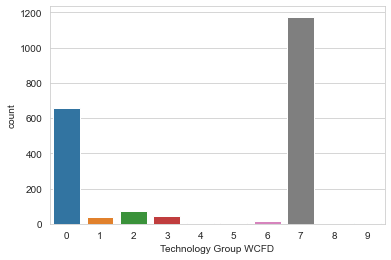

In [33]:
# Count number of instances for Technology Group
sns.set_style('whitegrid')
sns.countplot(x='Technology Group WCFD', data=df)

<AxesSubplot:xlabel='Frac Fluid WCFD', ylabel='count'>

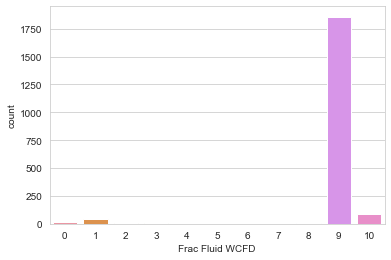

In [34]:
# Count number of instances for Frac Fluid WCFD
sns.set_style('whitegrid')
sns.countplot(x='Frac Fluid WCFD', data=df)

From the countplots, the dataset is strongly biased towards using 2 Technologies and one type of Frac Fluid.  The utility of these two inputs may be limited because of the strong bias towards those specific input variables.

### MODEL RUN #1

In [35]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [36]:
# separate input (y) and target (x) variables
# create _train and _test dataset for model
x = df.drop(columns=['First 12 mo CALENDAR DAILY AVG BOE  Bbl']) # input features
y = df['First 12 mo CALENDAR DAILY AVG BOE  Bbl'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

Let's run some models without on the dataset without scaling or feature selection to evaluate the data.


In [37]:
# Linear Regression import and define as model
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()

# train the data using above Linear Regression model
LRmodel.fit(x_train, y_train)

LinearRegression()

In [38]:
# make predictions with model
y_predicted = LRmodel.predict(x_test)

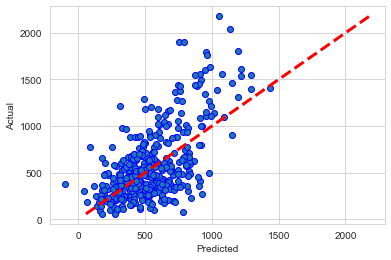

In [39]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [40]:
# model evaluation for testing set
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The LRmodel performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The LRmodel performance for testing set
--------------------------------------
MAE is 230.43465253510217
MSE is 90665.6467439353
R2 score is 0.38317192748076245


Linear Regression performance with no scaling is fair using MAE of 215 relative to the target mean of 546 and standard deviation of 362 .  However a R2 of 0.35 is quite poor and you can see a fair amount of scatter in the predicted vs actual plot.  The range of the data are very large for many of the inputs so scaling will be applied.   

In [41]:
# SVR regressor
from sklearn.svm import SVR
SVRmodel = SVR(kernel='linear')
SVRmodel.fit(x_train, y_train)

SVR(kernel='linear')

In [42]:
# make predictions with model
y_predicted = SVRmodel.predict(x_test)

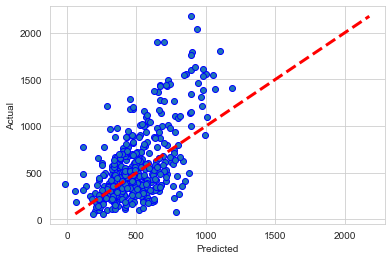

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [44]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The SVRmodel performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The SVRmodel performance for testing set
--------------------------------------
MAE is 232.60254489730823
MSE is 100133.16121720677
R2 score is 0.3187613275035813


In [45]:
# Random Forest import and define as model
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()

# train the data using Random Forest
RFmodel.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
# y make predictions with model
y_predicted = RFmodel.predict(x_test)

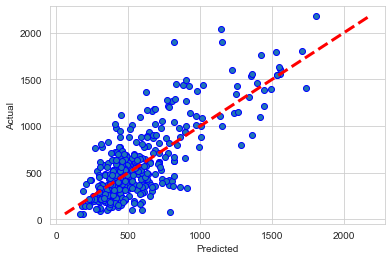

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [48]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model performance for testing set
--------------------------------------
MAE is 174.84581683168315
MSE is 56486.56311460396
R2 score is 0.6157034213010997


Overall performance for RandomForest is fair using MAE of 172 relative to the target mean of 546 and standard deviation of 362.  The R2 of 0.55 is also consider a fair especially considering no scaling was done.

In [49]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
# train the data using Ridge
Ridge.fit(x_train, y_train)

Ridge()

In [50]:
# y make predictions with model
y_predicted = Ridge.predict(x_test)

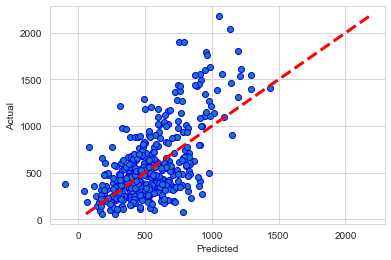

In [51]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [52]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Ridge model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Ridge model performance for testing set
--------------------------------------
MAE is 230.4247180358892
MSE is 90674.0590680257
R2 score is 0.3831146956863569


Ridge has virtually the same performance as linear regression and SVR, all of which are quite poor.

In [53]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(x_train, y_train)

Lasso()

In [54]:
# y make predictions with model
y_predicted = Lasso.predict(x_test)

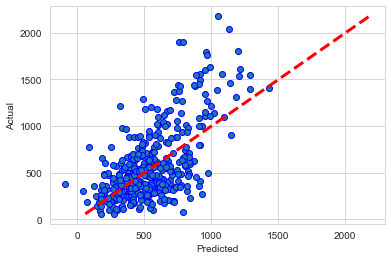

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [56]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Lasso model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Lasso model performance for testing set
--------------------------------------
MAE is 230.36704785223654
MSE is 90746.55608306013
R2 score is 0.3826214747625226


Lasso has virtually the same performance as linear regression, Ridge and SVR.

The data was unscaled so the next model run will use scaling appropriate for the dataset (i.e. skewed with lots of outliers).  

### MODEL RUN #2

In [57]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using robust scaler 
from sklearn.preprocessing import RobustScaler
rbsc = RobustScaler()

In [58]:
x_train = rbsc.fit_transform(x_train) # fit and transform
x_test = rbsc.transform(x_test) # only transform the data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [60]:
# Linear Regression import and define as model
LRmodel2 = LinearRegression()

# train the data using above Linear Regression model
LRmodel2.fit(x_train, y_train)

LinearRegression()

In [61]:
# make predictions with model
y_predicted = LRmodel2.predict(x_test)

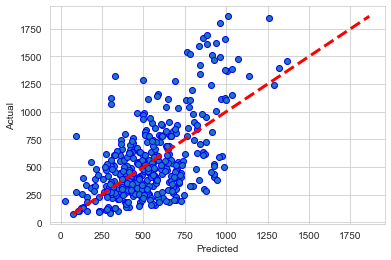

In [62]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [63]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The LR model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The LR model 2 performance for testing set
--------------------------------------
MAE is 217.05757226186108
MSE is 79447.29079878805
R2 score is 0.37256689588724556


Linear Regression performance is virtually the same as the unscaled.  Given it's poor performance in both scaled and unscaled.  This model will be abandoned in future model version.

In [64]:
# SVR regressor
SVRmodel2 = SVR(kernel='linear')
SVRmodel2.fit(x_train, y_train)

SVR(kernel='linear')

In [65]:
# make predictions with model
y_predicted = SVRmodel2.predict(x_test)

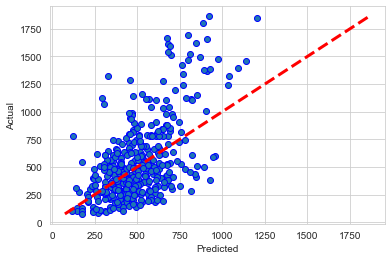

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [67]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The SVR model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The SVR model 2 performance for testing set
--------------------------------------
MAE is 217.08413463285154
MSE is 83667.42334642477
R2 score is 0.33923849868818867


In [68]:
# Random Forest import and define as model
RFmodel2 = RandomForestRegressor()

# train the data using Random Forest
RFmodel2.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
# y make predictions with model
y_predicted = RFmodel2.predict(x_test)

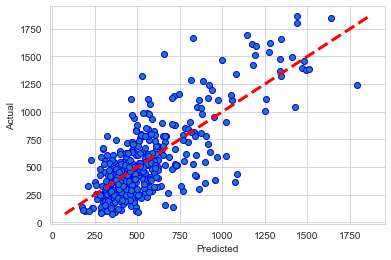

In [70]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [71]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model 2 performance for testing set
--------------------------------------
MAE is 174.85450495049506
MSE is 52026.504766831684
R2 score is 0.5891219064390276


Random Forest has similar to slightly poorer error test performance as the unscaled version.  Overall it has been the best predictor so far.

In [72]:
# import ridge and deploy algorithm
from sklearn.linear_model import Ridge
Ridge2 = Ridge()
# train the data using Ridge
Ridge2.fit(x_train, y_train)

Ridge()

In [73]:
# y make predictions with model
y_predicted = Ridge2.predict(x_test)

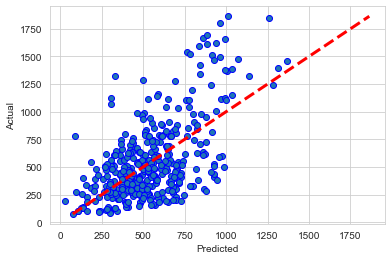

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [75]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Ridge 2 model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Ridge 2 model performance for testing set
--------------------------------------
MAE is 217.06104002187575
MSE is 79441.00595039559
R2 score is 0.37261653032910136


Ridge remains a poor performer and has slightly worse outcome from the first iteration.

In [76]:
# import Lasso and deploy algorithm 
from sklearn.linear_model import Lasso
Lasso2 = Lasso()
Lasso2.fit(x_train, y_train)

Lasso()

In [77]:
# y make predictions with model
y_predicted = Lasso2.predict(x_test)

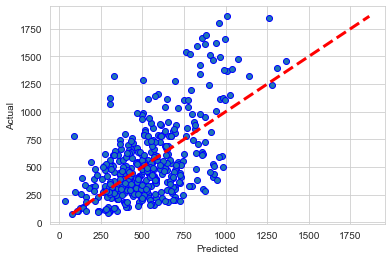

In [78]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [79]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Lasso 2 model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Lasso 2 model performance for testing set
--------------------------------------
MAE is 217.16476147991682
MSE is 79434.81730807322
R2 score is 0.37266540498578915


Lasso also has virtually the same prediction performance as Ridge.  

### REWRANGLE INPUT DATA

<AxesSubplot:>

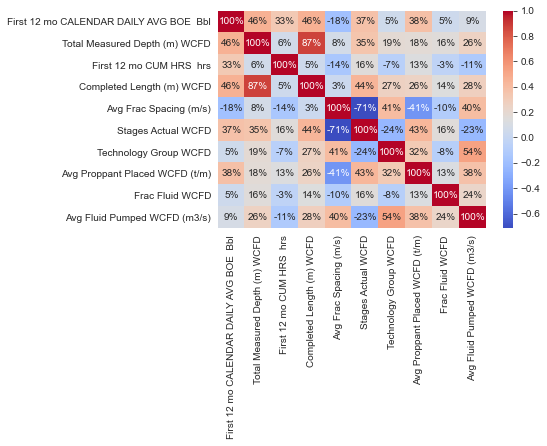

In [80]:
# remove inputs with low correlation and/or strongly correlate to other inputs
# revisit pearsons correlation
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')

'Total measured depth' has high correlation to 'completed length' so one will be removed as an input feature.  The target 'First 12mo Calendar Daily Avg BOE' is derivative of the 'First 12mo CUM HRS' so it will be removed.  'Avg Frac Spacing' and 'Stages Actual' are highly correlated (negatively) and the former correlates very poorly to the target so it will be removed.    

In [81]:
# delete not necessary to the analysis.  Others will follow further analysis
df = df.drop(columns = ['Total Measured Depth (m) WCFD','First 12 mo CUM HRS  hrs',
                        'Avg Frac Spacing (m/s)'])
# confirm change
df.head()

,First 12 mo CALENDAR DAILY AVG BOE Bbl,Completed Length (m) WCFD,Stages Actual WCFD,Technology Group WCFD,Avg Proppant Placed WCFD (t/m),Frac Fluid WCFD,Avg Fluid Pumped WCFD (m3/s)
0,2379,2785,28,7,2.0,9,478.3
1,2301,3049,30,7,1.8,9,430.7
2,2417,3841,38,7,1.8,9,441.7
3,2178,3049,30,7,1.8,9,429.5
4,1906,2167,39,1,0.9,9,250.1


### MODEL RUN #3

In [82]:
# Retrain and split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
# separate input (y) and target (x) variables
# create _train and _test dataset for model
x = df.drop(columns=['First 12 mo CALENDAR DAILY AVG BOE  Bbl']) # input features
y = df['First 12 mo CALENDAR DAILY AVG BOE  Bbl'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [83]:
# Random Forest import and define as model
RFmodel3 = RandomForestRegressor()

# train the data using Random Forest
RFmodel3.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
# y make predictions with model
y_predicted = RFmodel3.predict(x_test)

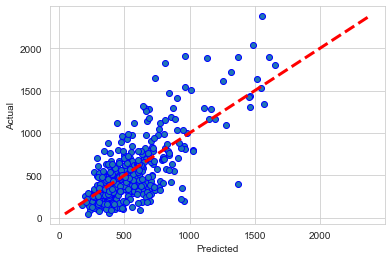

In [85]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [86]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model 3 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model 3 performance for testing set
--------------------------------------
MAE is 189.23056930693068
MSE is 65332.394740841584
R2 score is 0.5407859492121743


Random Forest has similar to slightly poorer error test performance as the unscaled version.  Overall it has been the best predictor so far.

In [87]:
# import ridge and deploy algorithm
Ridge3 = Ridge()
# train the data using Ridge
Ridge3.fit(x_train, y_train)

Ridge()

In [88]:
# y make predictions with model
y_predicted = Ridge3.predict(x_test)

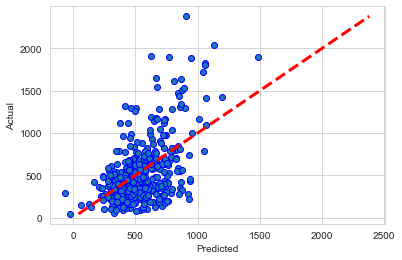

In [89]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [90]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Ridge 3 model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Ridge 3 model performance for testing set
--------------------------------------
MAE is 236.03002885804574
MSE is 100886.70303105857
R2 score is 0.2908787171617454


Ridge still remains a poor performer overall on all model iterations.

In [91]:
# import Lasso and deploy algorithm 
Lasso3 = Lasso()
Lasso3.fit(x_train, y_train)

Lasso()

In [92]:
# y make predictions with model
y_predicted = Lasso3.predict(x_test)

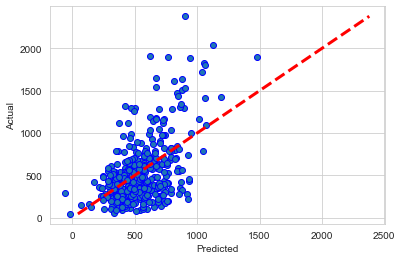

In [93]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [94]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Lasso 3 model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Lasso 3 model performance for testing set
--------------------------------------
MAE is 236.00445942499636
MSE is 100906.2187797915
R2 score is 0.2907415431600062


Lasso performance is comparatively a little worse than Ridge, but overall poor for all model iterations.  

## SUMMARY OF RESULTS

The first iteration with no scaling or input feature reduction that had the best performance was the Random Forest Model Regressor.  The test/train dataset was rerun several times with only minor changes in r2 (i.e. <0.02) and MAE (i.e. <5).  At the time of writing the output was:

    MAE is 172.75324257425743
    MSE is 55568.48883589109
    R2 score is 0.5522586696954772

Given a mean of 544 and standard deviation of 362, the MAE is a relatively fair result.  However, a r2 of 0.55, although suggests some correlation, it is far from a value of 1 (perfect prediction).  To put the results in context of production, the average well produces 544BOE/day (approx. 3.4mmcf/d gas equivalent) over the first 12months.  This prediction suggests an accuracy of +/- 172BOE (approx. 1.08mmcf/d gas equivalent) or +/- 31% of the mean.  In other terms, is slightly more than 1/2 a standard deviation.  If you refer to the violinplot below, and visualize the peak occurence of data just below 500, a value of +/-172 is significant relative to the bulk of the data.  The model is acceptable, but not a deployable.  Should further techniques or more data come available, a copy of the best model was preserved.  

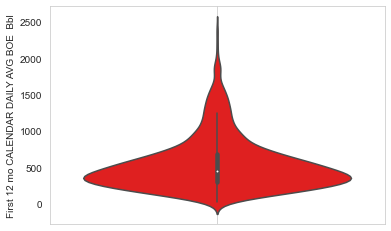

In [99]:
# violinplot using seaborn for target First 12 mo CALENDAR DAILY AVG BOE Bbl
sns.violinplot(y=df["First 12 mo CALENDAR DAILY AVG BOE  Bbl"], color="red" );
plt.grid()
plt.show()

In [100]:
# save best model Random Forest Regressor
import pickle

# Save an extisting model to file
pickle.dump(RFmodel, open("RFmodel.pkl", "wb"))

##  CONCLUSIONS

The BC Frac dataset was an attempt to predict productivity based on a series of inputs a company can control.  The essence of this hypothesis is; can an operator of a well entirely manage their production result using only inputs within their control.  Based on the results presented here, the answer is no, but the result does suggest that what you do to well after it is drilled does have a great impact.  However, production must ultimately be controlled by other factors.  At the top of this list must be reservoir parameters (e.g. porosity, permeability, fluid saturations, reservoir pressure) relevant to the rock being hydraulically fractured.  The problem is horizontal wells are unable to capture those parameters over the entire length of the well, so they must be extrapolated from nearby vertical wellbores where better reservoir data exists.  This extrapolation creates a range of potential error and makes it very difficult for a business in this industry to forecast.  In addition, this study illustrated that not all inputs are created equal.  Work done here asuggest that technology group and frac fluid, both having extreme interval variable imbalance, had little impact on the result.  This result was confirmed in MLOS (Braintoy ML program) using similar modelling as done here.  That means, completed length, avg proppant placed and avg fluid pumped largely influence the result beyond the reservoir itself.

### RECOMMENDATIONS

Although the model use case was not successful, there are recommendations to help improve the model in it's current format.  These include:

    1. Use a production rate at a specific time stamp for each well to remove the affects of vastly differing producing hours.  For example, the actual daily rate as of a 8760 producing hours (1yr).  
    2. Provide other known parameters such as reservoir pressure.  Missing values could be imuputed using a known pressure gradient.
    3. Separate dataset into wells with high liquids vs wells primarily 'dry gas'.  Run separate models on each dataset. 
    4. Remove wells with 'parent-child' (i.e. one well drilled adjacent to another, but one has produced for awhile before the other is drilled) relationships.  Drainage due to offset production could negatively alter the outcome.
    5. Include wells from AB to greatly expand the dataset and use neural network for modelling in addition to the algorithms used here.